### *Importação das Bibliotecas Utilizadas*


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import spacy
import nltk
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from nltk import tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet, stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# *1 - Pré-processamento*



In [2]:
#leitura do dataset e criação do dataframe
df = pd.read_csv('Travel_Chalenge.csv', sep=';')
df

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
0,Air Seychelles,8,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CityJet,1,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shanghai Airlines,9,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN
3,Aerolineas Argentinas,8,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,NaN,0.0,NaN
4,Adria Airways,7,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,Gulf Air,1,"""denied to provide lounge access""",9th September 2022,Very poor service. I had to leave to Bahrain ...,NaN,Solo Leisure,Economy Class,London to Bahrain,September 2022,1.0,1.0,NaN,1.0,NaN,NaN
17698,Jetstar Airways,1,"""2kg extra and told me to cough up $65""",9th September 2022,Sydney to Gold Coast. Please be aware of the ...,NaN,Solo Leisure,Economy Class,Sydney to Gold Coast,September 2022,2.0,2.0,1.0,1.0,NaN,NaN
17699,LOT Polish Airlines,1,"""No proper customer care""",9th September 2022,Berlin to Warsaw via Delhi. Try to avoid this...,NaN,Family Leisure,Economy Class,Berlin to Warsaw via Delhi,July 2022,1.0,1.0,1.0,1.0,1.0,1.0
17700,Volotea,7,"""cabin luggage policy is disappointing""",9th September 2022,"Volotea is a nice low-cost company, prices a...",NaN,Solo Leisure,Economy Class,Toulouse to Strasbourg,December 2021,3.0,4.0,NaN,4.0,NaN,NaN


In [3]:
#análise dos tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            17702 non-null  object 
 1   Overall_Rating          17702 non-null  object 
 2   Review_Title            17702 non-null  object 
 3   Review Date             17702 non-null  object 
 4   Review                  17702 non-null  object 
 5   Aircraft                5665 non-null   object 
 6   Type Of Traveller       15953 non-null  object 
 7   Seat Type               17461 non-null  object 
 8   Route                   15876 non-null  object 
 9   Date Flown              15944 non-null  object 
 10  Seat Comfort            15456 non-null  float64
 11  Cabin Staff Service     15366 non-null  float64
 12  Food & Beverages        11924 non-null  float64
 13  Ground Service          15056 non-null  float64
 14  Inflight Entertainment  9231 non-null 

In [4]:
#análise estatística das colunas numéricas
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
count,15456.000000,15366.000000,11924.000000,15056.000000,9231.000000,5243.000000
mean,2.598344,2.850709,2.536313,2.330433,2.244611,1.800877
std,1.456198,1.595379,1.513762,1.591097,1.486511,1.327095
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#verificação de valores nulos
df.isnull().sum()

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Review                        0
Aircraft                  12037
Type Of Traveller          1749
Seat Type                   241
Route                      1826
Date Flown                 1758
Seat Comfort               2246
Cabin Staff Service        2336
Food & Beverages           5778
Ground Service             2646
Inflight Entertainment     8471
Wifi & Connectivity       12459
dtype: int64

In [7]:
#porcentagem de nulos
porcentagem = (df.isnull().sum()/df.shape[0]).sort_values(ascending= True) * 100
df_nulos = pd.DataFrame(porcentagem, columns=['% de Nulos'])
df_nulos = df_nulos.sort_values(by='% de Nulos', ascending=False)
df_nulos

,% de Nulos
Wifi & Connectivity,70.381878
Aircraft,67.997966
Inflight Entertainment,47.853350
Food & Beverages,32.640380
Ground Service,14.947464
Cabin Staff Service,13.196249
Seat Comfort,12.687832
Route,10.315219
Date Flown,9.931081
Type Of Traveller,9.880240


In [9]:
#substituir nulos de features numéricas com a média e nulos de features categóricas por moda
df['Seat Comfort'].fillna(df['Seat Comfort'].mean(), inplace=True)
df['Cabin Staff Service'].fillna(df['Cabin Staff Service'].mean(), inplace=True)
df['Ground Service'].fillna(df['Ground Service'].mean(), inplace=True)
df['Food & Beverages'].fillna(df['Food & Beverages'].mean(), inplace=True)
df['Wifi & Connectivity'].fillna(df['Wifi & Connectivity'].mean(), inplace=True)
df['Inflight Entertainment'].fillna(df['Inflight Entertainment'].mean(), inplace=True)


df['Seat Type'].fillna(df['Seat Type'].mode()[0], inplace=True)
df['Type Of Traveller'].fillna(df['Type Of Traveller'].mode()[0], inplace=True)
df['Date Flown'].fillna(df['Date Flown'].mode()[0], inplace=True)
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['Aircraft'].fillna(df['Aircraft'].mode()[0], inplace=True)

C:\Users\samsung\AppData\Local\Temp\ipykernel_13656\3279728625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Seat Comfort'].fillna(df['Seat Comfort'].mean(), inplace=True)
C:\Users\samsung\AppData\Local\Temp\ipykernel_13656\3279728625.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [10]:
#verificação das substituições
df

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
0,Air Seychelles,8,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,2.598344,2.850709,2.536313,2.330433,2.244611,1.800877
1,CityJet,1,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,2.598344,2.850709,2.536313,2.330433,2.244611,1.800877
2,Shanghai Airlines,9,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,3.000000,4.000000,4.000000,2.330433,2.000000,1.800877
3,Aerolineas Argentinas,8,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,3.000000,4.000000,0.000000,2.330433,0.000000,1.800877
4,Adria Airways,7,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,4.000000,4.000000,4.000000,2.330433,0.000000,1.800877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,Gulf Air,1,"""denied to provide lounge access""",9th September 2022,Very poor service. I had to leave to Bahrain ...,A320,Solo Leisure,Economy Class,London to Bahrain,September 2022,1.000000,1.000000,2.536313,1.000000,2.244611,1.800877
17698,Jetstar Airways,1,"""2kg extra and told me to cough up $65""",9th September 2022,Sydney to Gold Coast. Please be aware of the ...,A320,Solo Leisure,Economy Class,Sydney to Gold Coast,September 2022,2.000000,2.000000,1.000000,1.000000,2.244611,1.800877
17699,LOT Polish Airlines,1,"""No proper customer care""",9th September 2022,Berlin to Warsaw via Delhi. Try to avoid this...,A320,Family Leisure,Economy Class,Berlin to Warsaw via Delhi,July 2022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
17700,Volotea,7,"""cabin luggage policy is disappointing""",9th September 2022,"Volotea is a nice low-cost company, prices a...",A320,Solo Leisure,Economy Class,Toulouse to Strasbourg,December 2021,3.000000,4.000000,2.536313,4.000000,2.244611,1.800877


In [11]:
#verificação dos nulos pós substituições
df.isnull().sum()

Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
dtype: int64

Considerações: nesta etapa de pré-processamento, de acordo com a porcentagem de nulos ser muito alta em algumas features, o ideal seria excluir essas colunas para não impactar na análise, portanto, depende dos seus objetivos com os dados. Como o objetivo desse dataset em questão era relacionar, ao final, todas as colunas de ratings com a coluna Overall_rating, eu optei por substituir valores numéricos pela média, e os categóricos pela moda. 

# *2 - Tokenização e Remoção de StopWords*


In [9]:
#carregar o modelo en_core para começar a tokenização
nlp = spacy.load('en_core_web_sm')

In [10]:
#criar uma função para processar os textos com spacy (tokeniza e lemmatiza)
def process_text(text):
    if pd.isna(text):
        return ''
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

#aplicar a função às colunas Review e Review_title
df['Processed_Review'] = df['Review'].apply(process_text)
df['Processed_Review_Title'] = df['Review_Title'].apply(process_text)

#exibir o DataFrame resultante
print(df)

                Airline Name Overall_Rating  \
0             Air Seychelles              8   
1                    CityJet              1   
2          Shanghai Airlines              9   
3      Aerolineas Argentinas              8   
4              Adria Airways              7   
...                      ...            ...   
17697               Gulf Air              1   
17698        Jetstar Airways              1   
17699    LOT Polish Airlines              1   
17700                Volotea              7   
17701                Volotea              9   

                                  Review_Title         Review Date  \
0               Air Seychelles customer review     10th April 2011   
1                      CityJet customer review     10th April 2011   
2            Shanghai Airlines customer review     10th April 2012   
3        Aerolineas Argentinas customer review     10th April 2014   
4                Adria Airways customer review     10th April 2015   
...            

In [11]:
#sem a tokenização 
print(df[['Review', 'Review_Title']])


                                                  Review  \
0      LHR-SEZ-LHR. It's true that there aren't perso...   
1      London City to Antwerp was delayed 3 hours 40 ...   
2      PEK to HGH in Economy. Slight delay out of PEK...   
3      Rio to Buenos Aires AEP on 737. Departure dela...   
4      Outbound flight FRA/PRN A319. 2 hours 10 min f...   
...                                                  ...   
17697   Very poor service. I had to leave to Bahrain ...   
17698   Sydney to Gold Coast. Please be aware of the ...   
17699   Berlin to Warsaw via Delhi. Try to avoid this...   
17700    Volotea is a nice low-cost company, prices a...   
17701    Some ladies of the staff from the land of th...   

                                  Review_Title  
0               Air Seychelles customer review  
1                      CityJet customer review  
2            Shanghai Airlines customer review  
3        Aerolineas Argentinas customer review  
4                Adria Airways cus

In [12]:
#com tokenização
print(df[['Processed_Review', 'Processed_Review_Title']])


                                        Processed_Review  \
0      LHR SEZ LHR true personal tv like Virgin BA pa...   
1      London City Antwerp delay 3 hour 40 min sure t...   
2      PEK HGH Economy slight delay PEK uneventful fl...   
3      Rio Buenos Aires aep 737 departure delay 30min...   
4      outbound flight FRA PRN A319 2 hour 10 min fli...   
...                                                  ...   
17697    poor service leave Bahrain London 9th Septem...   
17698    Sydney Gold Coast aware sly sneaky business ...   
17699    Berlin Warsaw Delhi try avoid airline possib...   
17700     Volotea nice low cost company price low att...   
17701     lady staff land airport Oviedo friendly pas...   

                      Processed_Review_Title  
0             Air Seychelles customer review  
1                    CityJet customer review  
2          Shanghai Airlines customer review  
3      Aerolineas Argentinas customer review  
4              Adria Airways customer review

In [13]:
#criação da função para remover stopwords
def remove_stopwords(text):
    if pd.isna(text):
        return ''
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

#aplicar a função às colunas Review e Review_title
df['Processed_Review'] = df['Review'].apply(remove_stopwords)
df['Processed_Review_Title'] = df['Review_Title'].apply(remove_stopwords)

#exibir o resultado
print(df[['Processed_Review', 'Processed_Review_Title']])


                                        Processed_Review  \
0      LHR SEZ LHR true personal TVs like Virgin BA p...   
1      London City Antwerp delayed 3 hours 40 mins su...   
2      PEK HGH Economy Slight delay PEK uneventful fl...   
3      Rio Buenos Aires AEP 737 Departure delayed 30m...   
4      Outbound flight FRA PRN A319 2 hours 10 min fl...   
...                                                  ...   
17697    poor service leave Bahrain London 9th Septem...   
17698    Sydney Gold Coast aware sly sneaky business ...   
17699    Berlin Warsaw Delhi Try avoid airline possib...   
17700     Volotea nice low cost company prices low at...   
17701     ladies staff land airport Oviedo friendly p...   

                      Processed_Review_Title  
0             Air Seychelles customer review  
1                    CityJet customer review  
2          Shanghai Airlines customer review  
3      Aerolineas Argentinas customer review  
4              Adria Airways customer review

In [14]:
#exibir a frequência das palavras que mais aparecem nas Reviews para comparar com o WordCloud
space_token = tokenize.WhitespaceTokenizer()

all_words = ' '.join([word for word in df.Processed_Review])
frequence = nltk.FreqDist(space_token.tokenize(all_words))
df_frequence = pd.DataFrame({ 'Word': list(frequence.keys()),'Frequence': list(frequence.values()) })
df_frequence = df_frequence.sort_values(by='Frequence', ascending=False)


df_frequence.head(20)

,Word,Frequence
33,flight,31679
173,time,9688
250,service,9557
30,airline,9374
24,hours,6397
175,staff,5830
56,airport,5798
50,check,5629
137,flights,5531
202,plane,5152


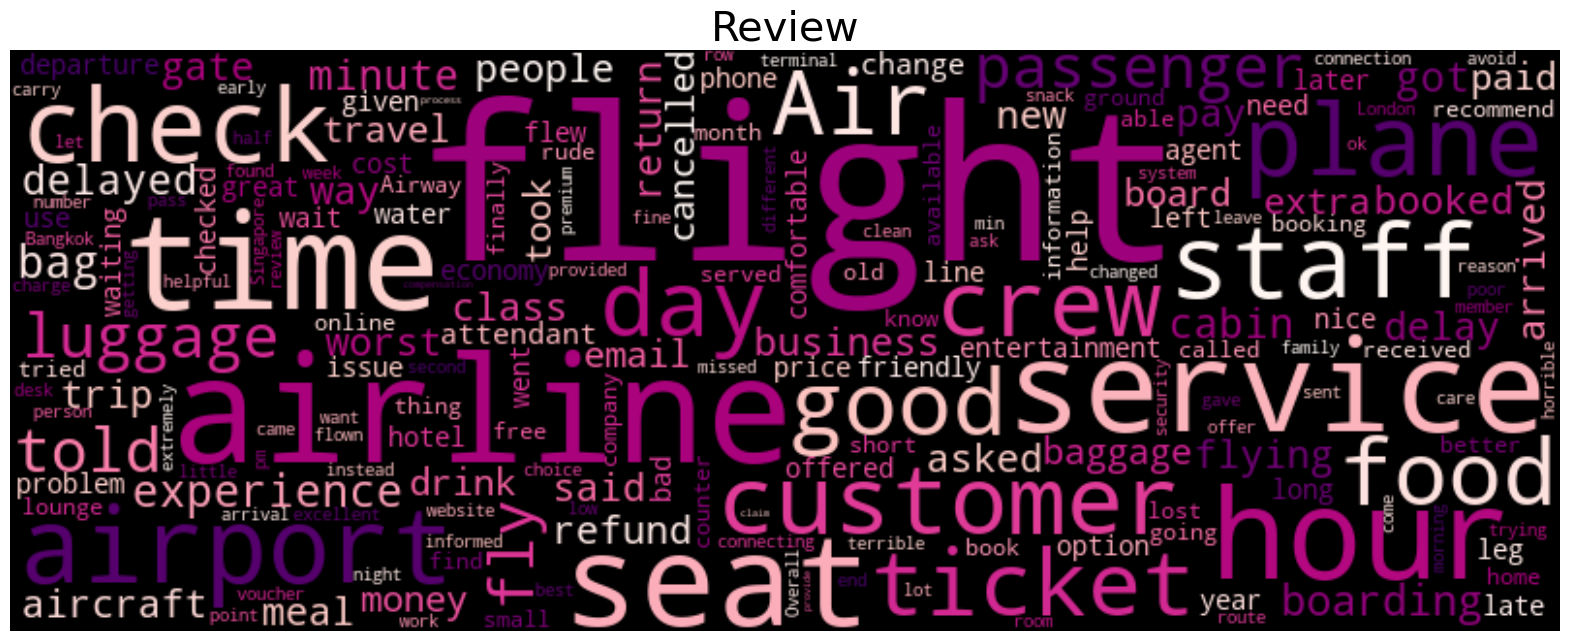

In [15]:
#WordCloud das Reviews
wc = WordCloud(width = 800, height = 300, colormap="RdPu_r", max_font_size = 110, collocations = False
                          ).generate(' '.join(df.Processed_Review))

plt.figure(figsize = (20, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Review', fontsize = 30)
plt.show()

In [16]:
#exibir a frequência das palavras que mais aparecem nas nos Títulos das Reviews para comparar com o WordCloud

space_token = tokenize.WhitespaceTokenizer()

all_words = ' '.join([word for word in df.Processed_Review_Title])
frequence = nltk.FreqDist(space_token.tokenize(all_words))
df_frequence = pd.DataFrame({ 'Word': list(frequence.keys()),'Frequence': list(frequence.values()) })
df_frequence = df_frequence.sort_values(by='Frequence', ascending=False)


df_frequence.head(20)

,Word,Frequence
2,customer,2737
3,review,2039
18,service,1652
15,airline,1369
68,experience,1219
67,flight,1205
17,worst,704
0,Air,694
110,fly,605
6,Airlines,513


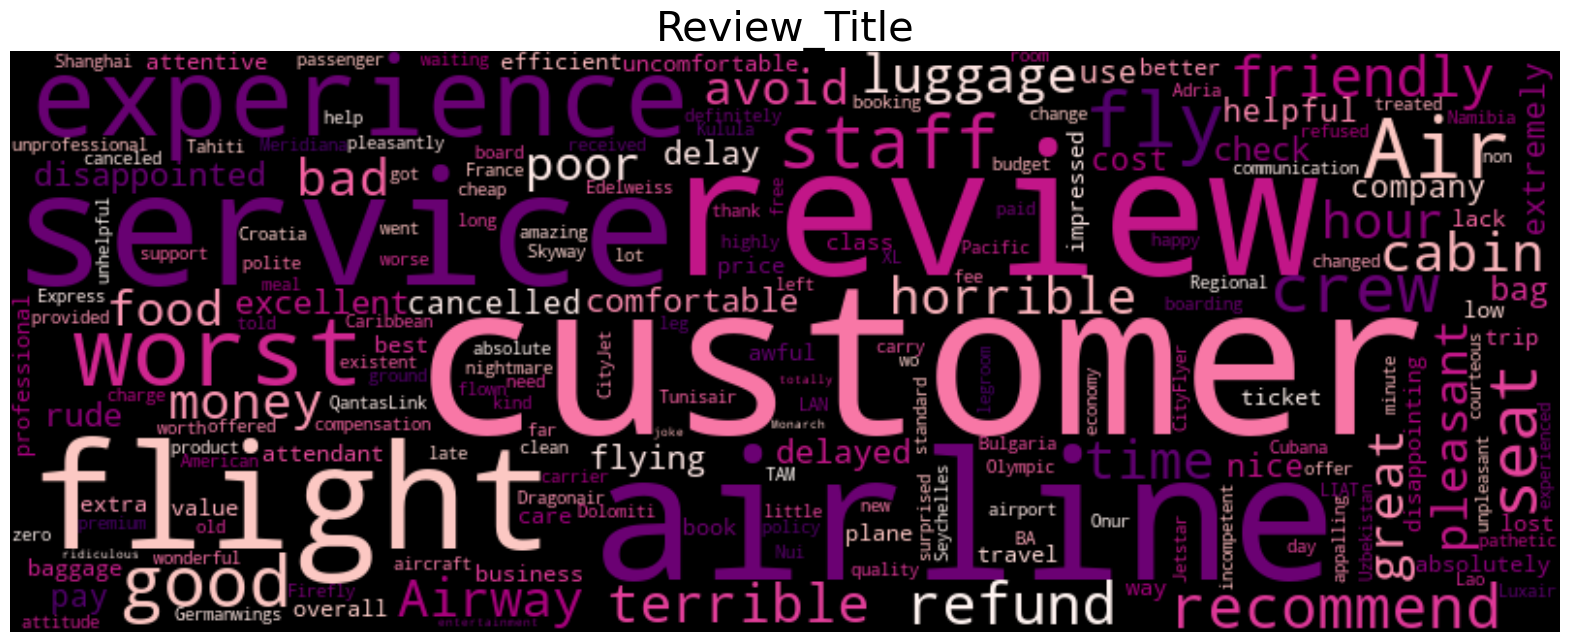

In [17]:
#WordCloud dos Títulos das Reviews
wc = WordCloud(width = 800, height = 300, colormap="RdPu_r", max_font_size = 110, collocations = False
                          ).generate(' '.join(df.Processed_Review_Title))

plt.figure(figsize = (20, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Review_Title', fontsize = 30)
plt.show()

Considerações: nesta etapa de tokenização, outros dois passos são importantes: a lemmatização e a stemização. Com a função process_text, é realizado a tokenização e a lemmatização. Não optei pela stemização, pois para as análises a seguir, preciso das palavras por completo, e não reduzidas à sua raíz. 

# *3 - Análise Exploratória dos Dados*



In [18]:
#verificação de valor não numérico na coluna Overall_Rating
non_numeric_values = df[~df['Overall_Rating'].str.replace('.', '', 1).str.isnumeric()]['Overall_Rating'].unique()
print(non_numeric_values)
non_numeric_count = len(non_numeric_values)
print(non_numeric_count)

['n']
1


In [19]:
#substituir o valor 'n' por um valor numérico pela média
mean_value = df[df['Overall_Rating'].str.isnumeric()]['Overall_Rating'].astype(float).mean()

#substituir 'n' pela média calculada
df['Overall_Rating'] = df['Overall_Rating'].replace('n', mean_value)

#converter a coluna para float
df['Overall_Rating'] = df['Overall_Rating'].astype(float)

In [20]:
#confirmação do tipo da coluna
df['Overall_Rating'].astype

<bound method NDFrame.astype of 0        8.0
1        1.0
2        9.0
3        8.0
4        7.0
        ... 
17697    1.0
17698    1.0
17699    1.0
17700    7.0
17701    9.0
Name: Overall_Rating, Length: 17702, dtype: float64>

Considerações: antes de transformar a variável Overall_Rating, precisei transformar um valor não numérico da coluna em numérico. 

### *3a - Gráfico de distribuição comparando Overall_Rating com Airline Name e Aircraft*

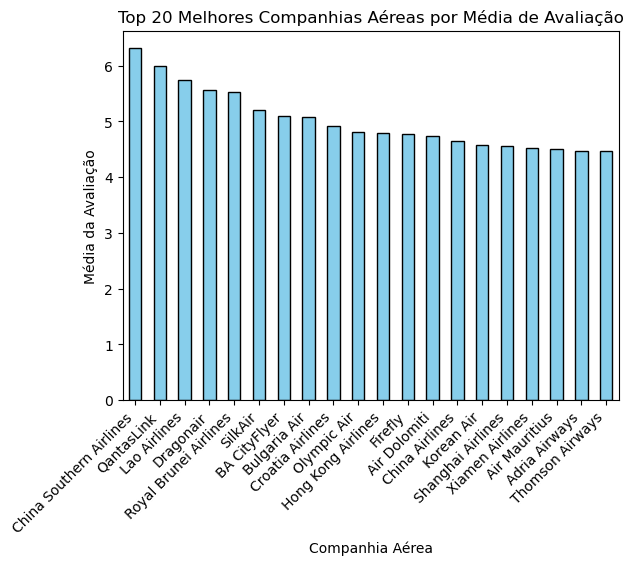

In [21]:
#agrupar nomes das aeronaves com a média das notas
mean_ratings = df.groupby('Airline Name')['Overall_Rating'].mean()

#selecionar as top N companhias aéreas
top_n = 20
top_airlines = mean_ratings.nlargest(top_n)

#criar o gráfico de barras
top_airlines.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Top {top_n} Melhores Companhias Aéreas por Média de Avaliação')
plt.xlabel('Companhia Aérea')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()


obs: Neste gráfico, percebe-se que as companhias aéreas com maiores médias de avaliação são China Southern, QantasLink e Lao Airlines

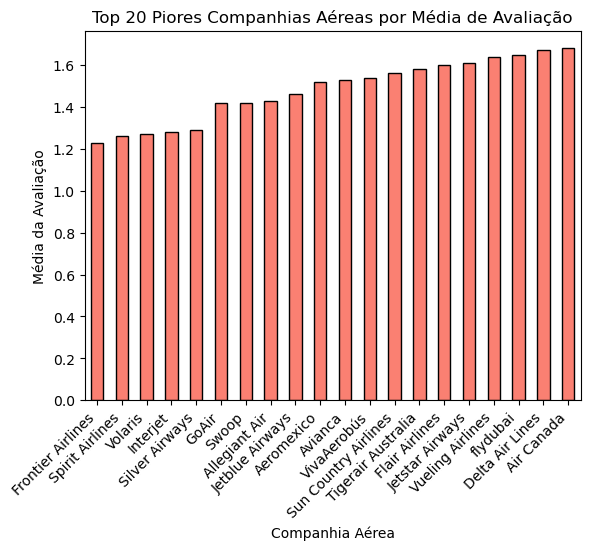

In [22]:
#selecionar as 20 piores
bottom_n = 20
bottom_airlines = mean_ratings.nsmallest(bottom_n)

#criar o gráfico de barras
bottom_airlines.plot(kind='bar', color='salmon', edgecolor='black')
plt.title(f'Top {bottom_n} Piores Companhias Aéreas por Média de Avaliação')
plt.xlabel('Companhia Aérea')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()

Aqui, as piores avaliações são das companhias: Frontier Airlines, Spirit Airlines e Volaris

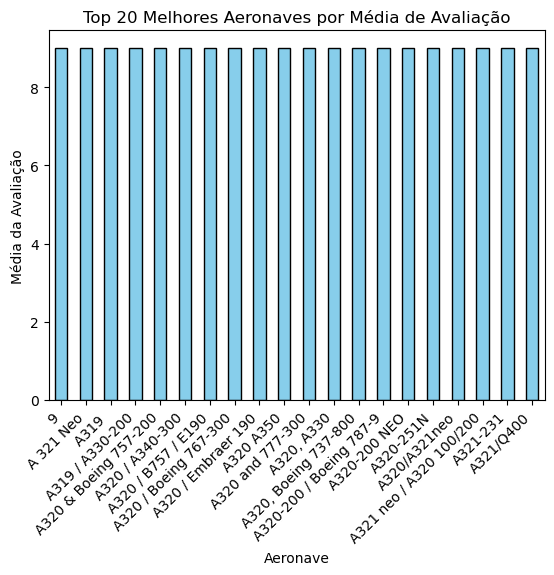

In [23]:
#agrupar o tipo de aeronave com as notas 
mean_ratings2 = df.groupby('Aircraft')['Overall_Rating'].mean()

#selecionar os 20 melhores
top_n = 20
top_aircrafts = mean_ratings2.nlargest(top_n)

#criar o gráfico de barras
top_aircrafts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Top {top_n} Melhores Aeronaves por Média de Avaliação')
plt.xlabel('Aeronave')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()

Neste gráfico, temos as aeronaves com avaliações muito parecidas pois essa coluna Aircraft apresentava muitos valores nulos.

Considerações: nesta etapa, selecionei apenas 20 aeronaves pois o número de aeronaves é muito grande, não sendo possível analisar somente em um gráfico. 

### *3b - Visualização em nuvem para notas >= 8 ou <=3*

In [24]:
#definir os intervalos
low_rating_reviews = df[df['Overall_Rating'] <= 3]['Processed_Review']
high_rating_reviews = df[df['Overall_Rating'] >= 8]['Processed_Review']

In [25]:
#combinar os textos em uma única string
low_rating_text = ' '.join(low_rating_reviews)
high_rating_text = ' '.join(high_rating_reviews)

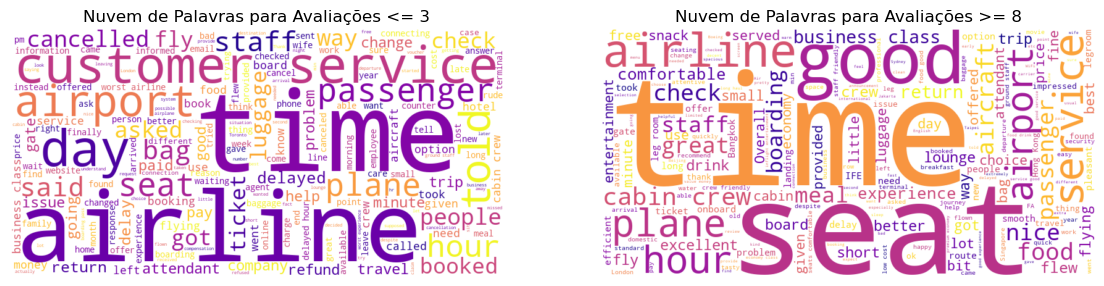

In [26]:
#excluir algumas palavras que mais aparecem
excluded_words = {'flight', 'flights'}
stopwords = set(STOPWORDS).union(excluded_words)

wordcloud_low = WordCloud(width=800, height=400, background_color='white', colormap='plasma',
                           stopwords=stopwords).generate(low_rating_text)

#gerar a nuvem de palavras para avaliações altas
wordcloud_high = WordCloud(width=800, height=400, background_color='white', colormap='plasma',
 stopwords=stopwords).generate(high_rating_text)

#plotar as nuvens de palavras
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Nuvem de Palavras para Avaliações <= 3')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Nuvem de Palavras para Avaliações >= 8')
plt.axis('off')

plt.show()

Considerações: nesta observação em nuvem, algumas palavras bem características das notas aparecem em evidência, e essa visualização foi super importante para a última etapa desta análise.

### *3c - Correlação entre as colunas*

In [27]:
#selecionar as colunas de interesse
columns_corr = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Overall_Rating']

#calcular a matriz de correlação
correlation_matrix = df[columns_corr].corr()

#exibir a matriz de correlação
print(correlation_matrix)

                        Seat Comfort  Cabin Staff Service  Food & Beverages  \
Seat Comfort                1.000000             0.744454          0.635205   
Cabin Staff Service         0.744454             1.000000          0.673459   
Food & Beverages            0.635205             0.673459          1.000000   
Ground Service              0.672073             0.671661          0.564443   
Inflight Entertainment      0.493562             0.467937          0.583978   
Wifi & Connectivity         0.379227             0.357971          0.411172   
Overall_Rating              0.446317             0.475397          0.365703   

                        Ground Service  Inflight Entertainment  \
Seat Comfort                  0.672073                0.493562   
Cabin Staff Service           0.671661                0.467937   
Food & Beverages              0.564443                0.583978   
Ground Service                1.000000                0.426710   
Inflight Entertainment        0.42671

Ao analisar os dados, visualizamos uma forte correlação entre algumas variáveis (valores mais próximos de 1)

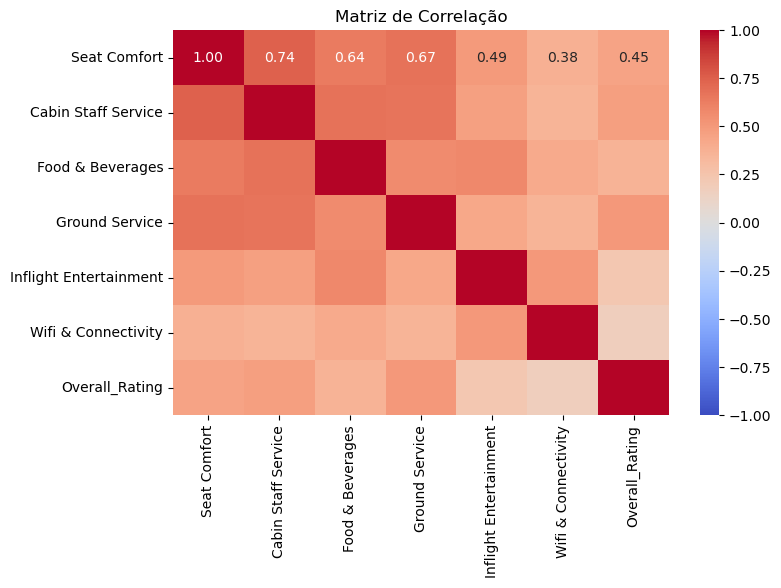

In [28]:
#criar um heatmap da matriz de correlação
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Considerações: para analisar a correlação, seria interessante também aplicar o modelo de Regressão Linear para verificar quais variáveis são mais impactantes para a target Overall_Rating, ou utilizar outros modelos de Machine Learning para ver a feature importance (processo realizado abaixo após aplicação do Random Forest)

### 4- *Criação de modelos*

#### *4a - Modelos utilizando textos da Review e Review_Title como inputs*

In [29]:
#definir os rótulos de sentimento
def classify_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif 4 <= rating <= 6:
        return 'neutral'
    else:
        return 'negative'

#aplicar a função para criar uma nova coluna de sentimento
df['Sentiment'] = df['Overall_Rating'].apply(classify_sentiment)

#concatenar as colunas de texto
df['Processed_Text'] = df['Processed_Review'] + " " + df['Processed_Review_Title']

In [40]:
#separar os dados em x e y
X_text = df['Processed_Text']
y = df['Sentiment']

#dividir os dados em treino e teste
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y, test_size=0.2, random_state=42)


### Naive Bayes

In [41]:
#vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

#modelo Naive Bayes para texto
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_text)

MultinomialNB()

In [42]:
#previsões e avaliação
y_pred_text = nb_model.predict(X_test_tfidf)
print("Modelo baseado em texto - Resultados")
print(classification_report(y_test_text, y_pred_text))

Modelo baseado em texto - Resultados
              precision    recall  f1-score   support

    negative       0.73      0.99      0.84      2498
     neutral       0.00      0.00      0.00       325
    positive       0.75      0.14      0.24       718

    accuracy                           0.73      3541
   macro avg       0.49      0.38      0.36      3541
weighted avg       0.66      0.73      0.64      3541



#### SVM - Suport Vector Machine

In [43]:
#modelo SVM com kernel linear
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train_text)

SVC(kernel='linear', random_state=42)

In [44]:
#previsões e avaliação
y_pred_svm = svm_model.predict(X_test_tfidf)
print("Modelo baseado em texto com SVM - Resultados")
print(classification_report(y_test_text, y_pred_svm))

Modelo baseado em texto com SVM - Resultados
              precision    recall  f1-score   support

    negative       0.83      0.92      0.88      2498
     neutral       0.26      0.03      0.06       325
    positive       0.64      0.65      0.64       718

    accuracy                           0.79      3541
   macro avg       0.58      0.54      0.53      3541
weighted avg       0.74      0.79      0.75      3541



#### SMOTE e GridSearchCV

In [109]:
#aplicar o SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_text_resampled = smote.fit_resample(X_train_tfidf, y_train_text)

#verificar a distribuição das classes após SMOTE
from collections import Counter
print('Distribuição após SMOTE:', Counter(y_train_text_resampled))

Distribuição após SMOTE: Counter({'negative': 10124, 'positive': 10124, 'neutral': 10124})


In [111]:
#ajustar o modelo
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_tfidf_resampled, y_train_text_resampled)

#fazer previsões no conjunto de teste original
y_pred_svm = svm_model.predict(X_test_tfidf)

#avaliar o modelo
print("Modelo baseado em texto com SVM - Resultados após SMOTE")
print(classification_report(y_test_text, y_pred_svm))

Modelo baseado em texto com SVM - Resultados após SMOTE
              precision    recall  f1-score   support

    negative       0.88      0.80      0.84      2498
     neutral       0.26      0.34      0.30       325
    positive       0.61      0.70      0.65       718

    accuracy                           0.74      3541
   macro avg       0.58      0.62      0.60      3541
weighted avg       0.77      0.74      0.75      3541



In [44]:
#definir o SVM
svm = SVC()

#definir o grid de parâmetros para ajuste
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

#usar GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_text, y_train_text)

#exibir os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.1min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 7.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 6.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 6.4min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 6.5min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 6.2min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 7.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 6.5min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 6.0min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 6.4min
[CV] END ...................C=0.1, gamma=auto, k

Considerações: aqui deixei o SMOTE e o GridSearchCV para demonstrar alternativas para melhorar o desempenho do modelo, tanto para balancear as classes quanto para ajustar hiperparâmetros. O smote foi realizado, mas o GridSearchCV não pois o tempo de execução foi muito grande, mesmo ajustando as métricas. 

#### Logistic Regression

In [48]:
#definir o modelo de Regressão Logística
lr_model = LogisticRegression(max_iter=1000)  # Aumentando o número de iterações para garantir a convergência

#treinar o modelo
lr_model.fit(X_train_tfidf, y_train_text)

LogisticRegression(max_iter=1000)

In [49]:
#fazer previsões no conjunto de teste
y_pred_lr = lr_model.predict(X_test_tfidf)

#avaliar o modelo
print("Modelo de Regressão Logística - Resultados")
print(classification_report(y_test_text, y_pred_lr))

Modelo de Regressão Logística - Resultados
              precision    recall  f1-score   support

    negative       0.83      0.93      0.88      2498
     neutral       0.36      0.06      0.10       325
    positive       0.67      0.64      0.65       718

    accuracy                           0.79      3541
   macro avg       0.62      0.54      0.54      3541
weighted avg       0.75      0.79      0.76      3541



In [55]:
#definir o espaço de hiperparâmetros para Randomized Search
param_distributions = {
    'C': uniform(loc=0.001, scale=10),  #intervalo de C entre 0.001 e 10
    'penalty': ['l1', 'l2'],  #tipo de regularização
    'solver': ['liblinear', 'saga']  #solvers que suportam 'l1'
}

#definir o modelo de Regressão Logística
lr_model = LogisticRegression(max_iter=1000)

#configurar Randomized Search
random_search = RandomizedSearchCV(
    lr_model,
    param_distributions,
    n_iter=10,  
    cv=5,  
    scoring='accuracy',  
    random_state=42,
    verbose=2,
    n_jobs=-1
)

#ajustar o modelo com Randomized Search
random_search.fit(X_train_tfidf_resampled, y_train_text_resampled)

#exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", random_search.best_params_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros: {'C': 8.325426408004217, 'penalty': 'l2', 'solver': 'saga'}


In [56]:
#fazer previsões no conjunto de teste
y_pred_lr = random_search.predict(X_test_tfidf)

#avaliar o modelo
print("Modelo de Regressão Logística com Randomized Search - Resultados")
print(classification_report(y_test_text, y_pred_lr))

Modelo de Regressão Logística com Randomized Search - Resultados
              precision    recall  f1-score   support

    negative       0.87      0.82      0.85      2498
     neutral       0.24      0.31      0.27       325
    positive       0.61      0.65      0.63       718

    accuracy                           0.74      3541
   macro avg       0.57      0.59      0.58      3541
weighted avg       0.76      0.74      0.75      3541



[[2053  228  217]
 [ 138  102   85]
 [ 165   88  465]]


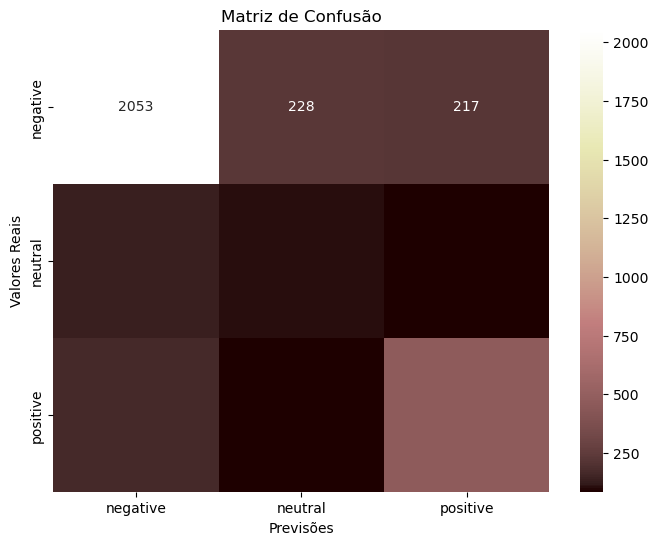

In [118]:
#gerar a matriz de confusão
cm = confusion_matrix(y_test_text, y_pred_lr, labels=random_search.classes_)
print(cm)

#configurar o tamanho da figura
plt.figure(figsize=(8, 6))

#criar o heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=random_search.classes_, yticklabels=random_search.classes_)

#adicionar títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')

#mostrar o gráfico
plt.show()

Considerações: o modelo com melhor desempenho foi o de Regressão Logística, o qual com o ajuste de hiperparâmetros com o RandomizedSearch, apresentou melhores resultados para avaliações neutras, porém, abaixou a acurácia e outras métricas. Todos os modelos testados tiveram dificuldade em acertar avaliações neutras, mas após técnicas de melhoria de desempenho, obtiveram melhores acertos nessas avaliações. 

#### *4b - Modelos utilizando notas das features*

#### Random Forest

In [57]:
#selecionar as colunas de features numéricas
X_features = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']]
y_features = df['Sentiment']

#dividir os dados em treino e teste
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

In [58]:
#modelo Random Forest para features numéricas
rf_model = RandomForestClassifier()
rf_model.fit(X_train_feat, y_train_feat)

RandomForestClassifier()

In [59]:
#previsões e avaliação
y_pred_feat = rf_model.predict(X_test_feat)
print("Modelo baseado em features numéricas - Resultados")
print(classification_report(y_test_feat, y_pred_feat))

Modelo baseado em features numéricas - Resultados
              precision    recall  f1-score   support

    negative       0.84      0.91      0.88      2498
     neutral       0.37      0.21      0.27       325
    positive       0.65      0.60      0.63       718

    accuracy                           0.78      3541
   macro avg       0.62      0.57      0.59      3541
weighted avg       0.76      0.78      0.77      3541



In [107]:
#obter as importâncias das características
importances = rf_model.feature_importances_
feature_names = X_features.columns

#criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

#ordenar o DataFrame por importância
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

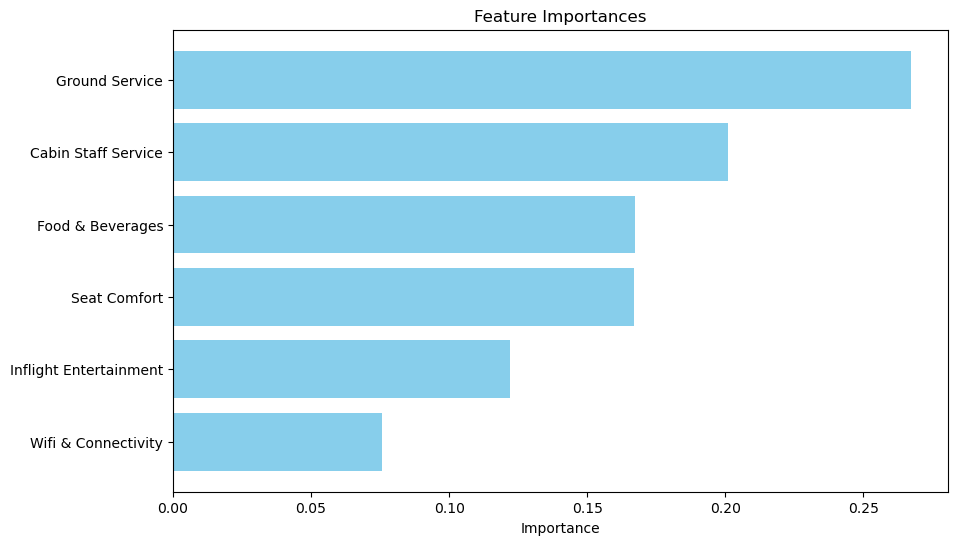

In [108]:
#plotar as importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o recurso mais importante apareça no topo
plt.show()

#### XGBoost

In [60]:
#criar um codificador de rótulos
label_encoder = LabelEncoder()

#ajustar e transformar os rótulos de texto em valores numéricos
y_features_encoded = label_encoder.fit_transform(y_features)

In [61]:
#dividir em treino e teste
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features, y_features_encoded, test_size=0.2, random_state=42)

#criar e treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_feat, y_train_feat)

#fazer previsões
y_pred_xgb = xgb_model.predict(X_test_feat)

#converter previsões numéricas de volta para texto
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

#converter os rótulos de teste numéricos de volta para texto
y_test_feat_labels = label_encoder.inverse_transform(y_test_feat)

c:\Users\samsung\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:
#avaliar o modelo
print("Modelo XGBoost - Resultados")
print(classification_report(y_test_feat_labels, y_pred_xgb_labels))

Modelo XGBoost - Resultados
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      2498
     neutral       0.38      0.20      0.26       325
    positive       0.67      0.67      0.67       718

    accuracy                           0.80      3541
   macro avg       0.64      0.59      0.60      3541
weighted avg       0.77      0.80      0.78      3541



[[2272   65  161]
 [ 189   64   72]
 [ 198   40  480]]


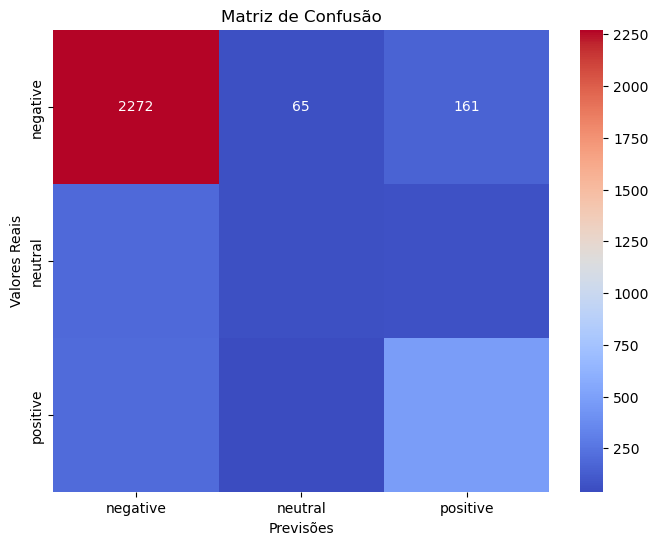

In [126]:
#gerar a matriz de confusão
cm2 = confusion_matrix(y_test_feat_labels, y_pred_xgb_labels, labels=random_search.classes_)
print(cm2)

#configurar o tamanho da figura
plt.figure(figsize=(8, 6))

#criar o heatmap da matriz de confusão
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm', xticklabels=random_search.classes_, yticklabels=random_search.classes_)

#adicionar títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')

#mostrar o gráfico
plt.show()

Considerações: o modelo que apresentou melhor desempenho foi o XGBoost, mas em comparação ao Random Forest, as diferenças foram poucas. Analisando a matriz de confusão, o modelo poderia ter um melhor desempenho se fosse realizado o GridSearchCV ou RandomizedSearch.

### *5 - Impacto de atrasos no NPS de 3 companhias aéreas*

In [63]:
#criar dicionário com palavras-chave relacionadas a atraso
delay_keywords = {'delayed', 'delay', 'time', 'hour', 'minute', 'waiting', 'wait', 'late', 'waiting'}

def contains_delay_keywords(review_text, keywords):
    return any(keyword in review_text.lower() for keyword in keywords)

#adicionar a coluna 'Delay' com base nas palavras-chave
df['Delay'] = df['Processed_Review'].apply(lambda x: 'Delay' if contains_delay_keywords(x, delay_keywords) else 'No Delay')

In [64]:
#criar função para calcular NPS 
def calculate_nps(df):
    positives = df[df['Sentiment'] == 'positive'].shape[0]
    negatives = df[df['Sentiment'] == 'negative'].shape[0]
    total = df.shape[0]

    percent_positive = positives / total
    percent_negative = negatives / total

    nps = (percent_positive - percent_negative) * 100
    return nps

#função que calcula o NPS para cada companhia aérea e tipo de atraso
def analyze_nps_by_airline(df):
    airlines = df['Airline Name'].unique()
    results = {}

    for airline in airlines:
        df_airline = df[df['Airline Name'] == airline]
        results[airline] = {
            'No Delay': calculate_nps(df_airline[df_airline['Delay'] == 'No Delay']),
            'Delay': calculate_nps(df_airline[df_airline['Delay'] == 'Delay'])
        }

    return pd.DataFrame(results).T

In [65]:
#analisar o impacto dos atrasos no NPS
results_df = analyze_nps_by_airline(df)
print(results_df)

                        No Delay      Delay
Air Seychelles        -34.782609 -52.941176
CityJet               -37.500000 -32.894737
Shanghai Airlines      20.000000 -25.000000
Aerolineas Argentinas  -5.555556 -28.048780
Adria Airways          11.111111 -30.136986
...                          ...        ...
Singapore Airlines    -35.483871  -8.695652
Qantas Airways        -56.000000 -73.333333
Luxair                -13.636364 -37.500000
Thai AirAsia          -64.285714  -7.042254
WOW air               -61.290323 -69.565217

[182 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

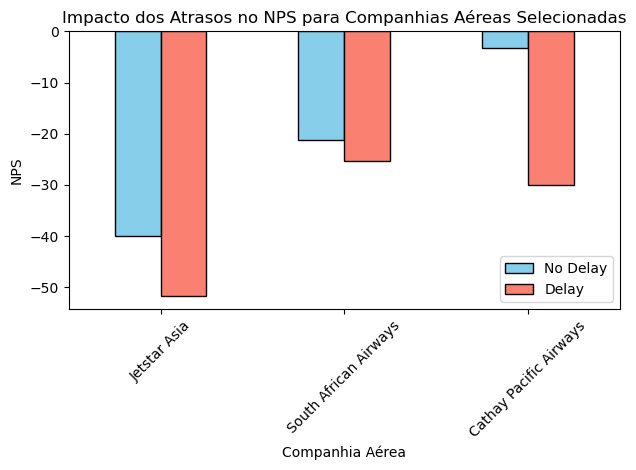

In [79]:
#selecionar 3 companhias aéreas aleatoriamente
selected_airlines = results_df.sample(n=3).index

#filtrar o DataFrame para incluir apenas as companhias selecionadas
filtered_results = results_df.loc[selected_airlines]

#ajustar o tamanho da figura
plt.figure(figsize=(10, 6))

#criar o gráfico de barras
filtered_results.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

#adicionar títulos e rótulos
plt.title('Impacto dos Atrasos no NPS para Companhias Aéreas Selecionadas')
plt.xlabel('Companhia Aérea')
plt.ylabel('NPS')
plt.xticks(rotation=45)  # Rotacionar os rótulos das companhias aéreas para melhor legibilidade

#mostrar o gráfico
plt.tight_layout()
plt.show()

Considerações finais: para analisar o impacto de atrasos no NPS, primeiro, foi necessário definir quais palavras estariam relacionadas a atraso, portanto, a nuvem de palavras de avaliações baixas foi essencial nesse momento. Para interpretação do gráfico, verifica-se um valor muito menor de NPS para companhias que possuem atraso. 